# Plot Cp distribution
## grid1 case, new BC, new Code, compare alpha_upw=1 with alpha_upw=0.25
Generate the `cylpressure.dat` file using

```bash
$ python3 ../utilities/pp_cyl.py -m rundir/out01/cylinder.e -t 60
```

In [1]:
%%capture
import sys
sys.path.insert(1, '../utilities')
import litCpData
import numpy as np
import matplotlib.pyplot as plt

# Define a useful function for pull stuff out of dicts
getparam = lambda keylabel, pdict, default: pdict[keylabel] if keylabel in pdict else default

In [2]:
# Basic problem parameters
D     = 6            # Cylinder diameter
U     = 20           # Freestream velocity
Lspan = 24           # Spanwise length
A     = D*Lspan      # frontal area
rho   = 1.225        # density
Q     = 0.5*rho*U*U  # Dynamic head

In [3]:
# Index of all runs here
runlist=[
    # Name,                                cylpressure file, style dict
    ['Nalu-Wind IDDES (alpha_upw=1.00)',     '../cylgrid1new_sst_iddes_01/cylpressure03.dat',   {'color':'k', 'lw':2, 'lstyle':'--'}],
    ['Nalu-Wind IDDES (alpha_upw=0.25)',     './cylpressure.dat',                               {'color':'k', 'lw':2, 'lstyle':'-'}],
]
    

In [4]:
# Load the pressure data
P = np.loadtxt('cylpressure.dat', skiprows=1, delimiter=',')

# Construct Theta vs Cp
XYtoDeg = lambda x, y: np.arctan2(y,x)*180.0/np.pi+180.0
X=np.array([XYtoDeg(P[:,0], P[:,1]), P[:,3]/Q]).transpose()
thetaCp=X[X[:,0].argsort()]

# Save the data
np.savetxt('CpDistribution.dat', thetaCp)

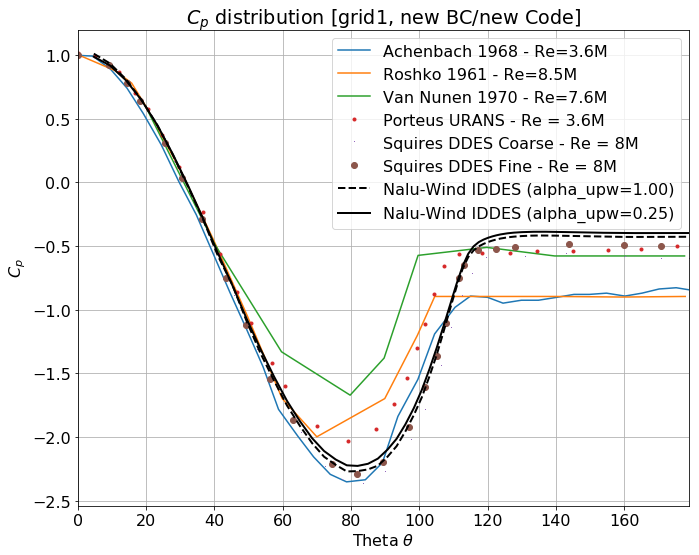

In [5]:
# Plot Cp distribution
plt.rc('font', size=16)
plt.figure(figsize=(10,8))

# Plot other people's values
litCpData.plotEXP()
litCpData.plotCFD()

for run in runlist:
    label    = run[0]
    filename = run[1]
    rundict  = run[2]
    P = np.loadtxt(filename, skiprows=1, delimiter=',')
    # Construct Theta vs Cp
    XYtoDeg = lambda x, y: np.arctan2(y,x)*180.0/np.pi+180.0
    X=np.array([XYtoDeg(P[:,0], P[:,1]), P[:,3]/Q]).transpose()
    thetaCp=X[X[:,0].argsort()]
    
    lstyle = getparam('lstyle', rundict, '-')
    lw     = getparam('lw', rundict, 1.25)
    color  = getparam('color', rundict, 'b')
    
    plt.plot(thetaCp[:,0], thetaCp[:,1],linestyle=lstyle, color=color, linewidth=lw, label=label)
    
plt.xlim([0, 179])
plt.legend()
plt.xlabel(r'Theta $\theta$')
plt.ylabel(r'$C_p$')
plt.grid()
plt.title(r'$C_p$ distribution [grid1, new BC/new Code]')
plt.tight_layout()